### Start off by importing required libraries

In [20]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [21]:
bnote= pd.read_csv(r"D:\Asus\Videos\BankNote_Authentication.csv")

### Data Cleaning and pre-processing / Exploratory Data Analysis

In [22]:
bnote.head(30)

variance  skewness  curtosis  entropy  class
0    3.62160    8.6661  -2.80730 -0.44699      0
1    4.54590    8.1674  -2.45860 -1.46210      0
2    3.86600   -2.6383   1.92420  0.10645      0
3    3.45660    9.5228  -4.01120 -3.59440      0
4    0.32924   -4.4552   4.57180 -0.98880      0
5    4.36840    9.6718  -3.96060 -3.16250      0
6    3.59120    3.0129   0.72888  0.56421      0
7    2.09220   -6.8100   8.46360 -0.60216      0
8    3.20320    5.7588  -0.75345 -0.61251      0
9    1.53560    9.1772  -2.27180 -0.73535      0
10   1.22470    8.7779  -2.21350 -0.80647      0
11   3.98990   -2.7066   2.39460  0.86291      0
12   1.89930    7.6625   0.15394 -3.11080      0
13  -1.57680   10.8430   2.54620 -2.93620      0
14   3.40400    8.7261  -2.99150 -0.57242      0
15   4.67650   -3.3895   3.48960  1.47710      0
16   2.67190    3.0646   0.37158  0.58619      0
17   0.80355    2.8473   4.34390  0.60170      0
18   1.44790   -4.8794   8.34280 -2.10860      0
19   5.24230   11.0272  -4.35300 -4.10130      0
20   5.78670    7.8902  -2.61960 -0.48708      0
21   0.32920   -4.4552   4.57180 -0.98880      0
22   3.93620   10.1622  -3.82350 -4.01720      0
23   0.93584    8.8855  -1.68310 -1.65990      0
24   4.43380    9.8870  -4.67950 -3.74830      0
25   0.70570   -5.4981   8.33680 -2.87150      0
26   1.14320   -3.7413   5.57770 -0.63578      0
27  -0.38214    8.3909   2.16240 -3.74050      0
28   6.56330    9.8187  -4.41130 -3.22580      0
29   4.89060   -3.3584   3.42020  1.09050      0

In [23]:
bnote.shape

(1372, 5)

In [24]:
bnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


#### 0: Counterfeit bank note; 1: Not Counterfeit 

In [25]:
bnote['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### No need of up-sampling/ down-sampling

In [26]:
bnote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [27]:
bnote.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [28]:
bnote.mean()

variance    0.433735
skewness    1.922353
curtosis    1.397627
entropy    -1.191657
class       0.444606
dtype: float64

<br>

**Visualisations**   : Uni-variate Plots 

<AxesSubplot:title={'center':'Density plot of variance attribute of the bank notes'}, xlabel='variance', ylabel='Density'>

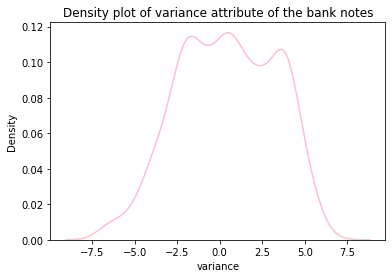

In [34]:
plt.title('Density plot of variance attribute of the bank notes')
sns.distplot(bnote['variance'], color='pink', hist=False)

<AxesSubplot:title={'center':'Density plot of skewness attribute of the bank notes'}, xlabel='skewness', ylabel='Density'>

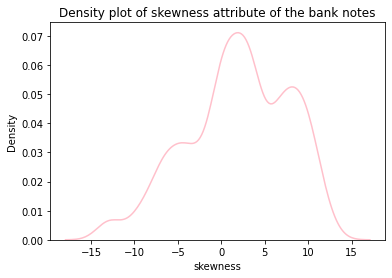

In [35]:
plt.title('Density plot of skewness attribute of the bank notes')
sns.distplot(bnote['skewness'], color='pink', hist=False)

<AxesSubplot:title={'center':'Density plot of cutosis attribute of the bank notes'}, xlabel='curtosis', ylabel='Density'>

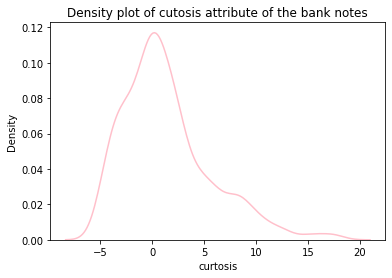

In [36]:
plt.title('Density plot of cutosis attribute of the bank notes')
sns.distplot(bnote['curtosis'], color='pink', hist=False)

<AxesSubplot:title={'center':'Density plot of class attributed to each of the bank notes'}, xlabel='class', ylabel='Density'>

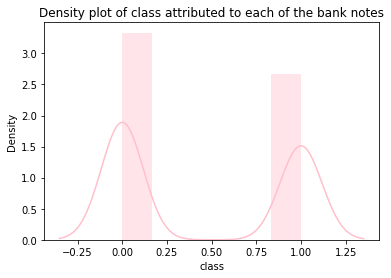

In [39]:
plt.title('Density plot of class attributed to each of the bank notes')
sns.distplot(bnote['class'], color='pink', hist=True)

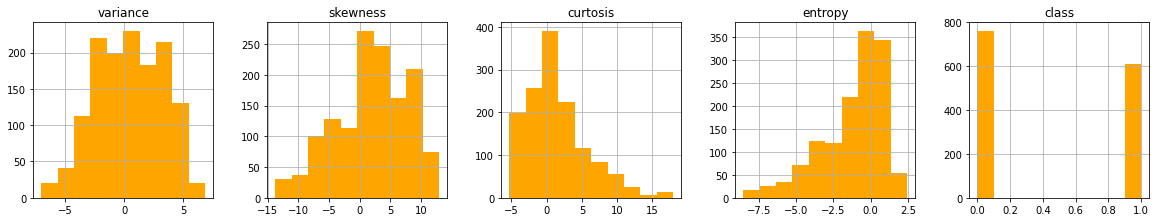

In [51]:
bnote.hist(figsize=[20,20], layout=(5,5), color='orange');

**Bi-Variate and Multi-Variate plots**

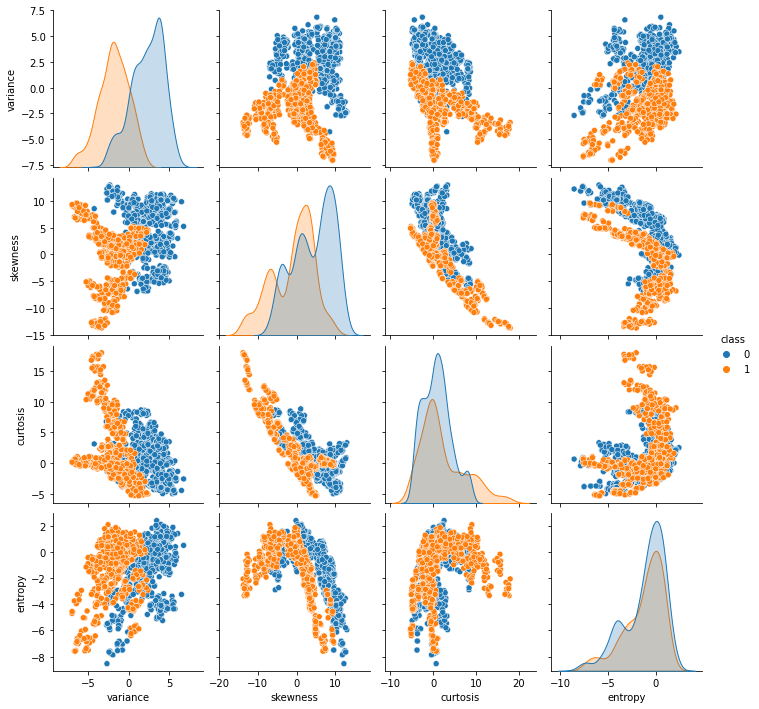

In [43]:
sns.pairplot(bnote, diag_kind='kde', hue='class' );

### Splitting data into independent and dependent variables

In [53]:
x=bnote.iloc[:,:-1]  # indeoendent variables

In [54]:
y=bnote.iloc[:,-1]   # dependent vatriable

#### Splitting data into training and testing dataset. Also normalizing the dataset so that if we need to ca;culate Euclidean Distances, higher values of one attribute doesn't dominate the other 

<br>

Doing this after train-test-split to avoid data-leak

In [65]:
from sklearn.model_selection import train_test_split as tts
from scipy.stats import zscore as zs

In [86]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.3, random_state=123)
xyrain=xtrain.apply(zs)
xtest=xtest.apply(zs)

In [85]:
xtrain

variance  skewness  curtosis   entropy
1011 -0.803045 -0.274757 -0.144875  1.242976
952  -0.604680  0.229959 -0.734538 -0.985190
289   0.988295  0.733631 -0.296019 -0.121387
1360 -0.239708  0.002462 -0.897613  0.184015
44    0.852427  0.851428 -0.508615  0.797852
...        ...       ...       ...       ...
1147 -0.750437 -1.540616  1.019523  0.647013
106   0.661522  1.490180 -1.143431 -1.702439
1041 -0.056453  0.503663 -1.466192 -2.203618
1122 -0.866458  0.328017 -0.471625  0.007931
1346  0.289776  0.502948 -1.551303 -2.229472

[960 rows x 4 columns]

In [139]:
ytest.value_counts()


0    233
1    179
Name: class, dtype: int64

In [88]:
print('class count of ytrain \n\n', ytrain.value_counts())
      

class count of ytrain 

 0    529
1    431
Name: class, dtype: int64


In [89]:
print('class count of ytest \n\n', ytest.value_counts())

class count of ytest 

 0    233
1    179
Name: class, dtype: int64


## Building a Logistic Regression Model

In [100]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import confusion_matrix as cm

In [101]:
classifier= LR(solver='liblinear')

In [102]:
classifier.fit(xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [107]:
ypred=classifier.predict(xtest)

In [112]:
stacked=np.stack([ytest,ypred], axis=1)

In [156]:
class_score=classifier.score(xtest,ytest)
print(class_score)

0.9805825242718447


### Getting cross_val_score

In [119]:
score1=cvs(classifier,x.apply(zs),y,cv=10)

In [126]:
score1

array([0.98550725, 0.98550725, 0.97080292, 0.98540146, 0.96350365,
       0.97810219, 0.98540146, 1.        , 0.98540146, 0.97080292])

#### Getting mean of cross val score

In [128]:
mean_score=score1.mean()

In [129]:
mean_Score

0.9810430551147784

In [135]:
#Getting confusion matrix
cm1=cm(ytest, ypred)

In [134]:
cm1

array([[225,   8],
       [  0, 179]], dtype=int64)

<AxesSubplot:>

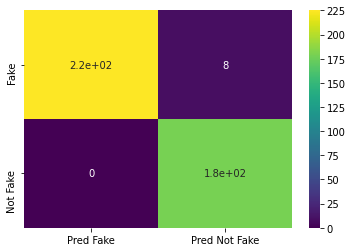

In [149]:
cm2=pd.DataFrame(cm1, index=['Fake','Not Fake'], columns=['Pred Fake','Pred Not Fake'])
sns.heatmap(cm2, annot=True, cmap='viridis')

## Getting Type 1 and Type 2 error assuming Ho or Null Hypo to be the statement that the Bank Note is Fake and the case when we classify the note as fake is the case when we accept the Null Hypo

In [150]:
type1_error=cm2.iloc[0,1]/(cm2.iloc[0,1]+cm2.iloc[0,0])


In [151]:
type1_error

0.034334763948497854

In [152]:
type2_error=cm2.iloc[1,0]/(cm2.iloc[1,0]+cm2.iloc[1,1])

In [153]:
type2_error

0.0

In [154]:
Accuracy=(cm2.iloc[1,1]+cm2.iloc[0,0])/(cm2.iloc[1,1]+cm2.iloc[0,0]+cm2.iloc[1,0]+cm2.iloc[0,1])

In [155]:
Accuracy

0.9805825242718447

## Making a classification report

In [158]:
from sklearn.metrics import classification_report as cr
print(cr(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       233
           1       0.96      1.00      0.98       179

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



## Classifying using Support Vector Machine

In [159]:
from sklearn.svm import SVC

In [161]:
ob1=SVC(kernel='linear')

In [162]:
ob1.fit(xtrain, ytrain)

SVC(kernel='linear')

In [164]:
ypred=ob1.predict(xtest)

In [165]:
score_svm=ob1.score(xtest,ytest)

In [167]:
score_svm

0.9805825242718447

## Getting cross_val_score

In [168]:
cross_val_score=cvs(ob1,x.apply(zs),y,cv=10)

In [169]:
cross_val_score

array([0.98550725, 0.99275362, 0.99270073, 0.98540146, 0.97080292,
       0.97810219, 0.98540146, 1.        , 0.98540146, 0.97810219])

In [170]:
cross_val_score.mean()

0.9854173278324341

In [175]:
cm1=cm(ytest, ypred)

In [176]:
cm1

array([[225,   8],
       [  0, 179]], dtype=int64)

<AxesSubplot:>

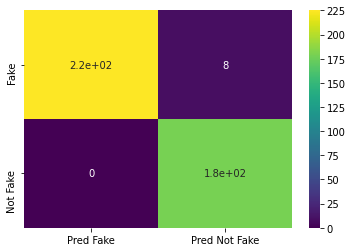

In [177]:
cm2=pd.DataFrame(cm1, index=['Fake','Not Fake'], columns=['Pred Fake','Pred Not Fake'])
sns.heatmap(cm2, annot=True, cmap='viridis')

In [178]:
type1_error=cm2.iloc[0,1]/(cm2.iloc[0,1]+cm2.iloc[0,0])


In [179]:
type1_error

0.034334763948497854

In [180]:
type2_error=cm2.iloc[1,0]/(cm2.iloc[1,0]+cm2.iloc[1,1])

In [183]:
type2_error

0.0

In [184]:
Accuracy=(cm2.iloc[1,1]+cm2.iloc[0,0])/(cm2.iloc[1,1]+cm2.iloc[0,0]+cm2.iloc[1,0]+cm2.iloc[0,1])

In [185]:
Accuracy

0.9805825242718447

## Now trying with RBF kernel

In [189]:
ob2=SVC(kernel='rbf')

In [190]:
ob2.fit(xtrain,ytrain)

SVC()

In [191]:
ob2.score(xtest,ytest)

0.9951456310679612

In [192]:
score2=cvs(classifier,x.apply(zs),y,cv=10)

In [193]:
score2

array([0.98550725, 0.98550725, 0.97080292, 0.98540146, 0.96350365,
       0.97810219, 0.98540146, 1.        , 0.98540146, 0.97080292])

In [194]:
score2.mean()

0.9810430551147784